# 1
Привести пример двух 100-элементных выборок, корреляция Спирмена которых равна 1, а корреляция Пирсона меньше 0.5.

pearson:  0.2520320339038703
spearman:  0.9999999999999999


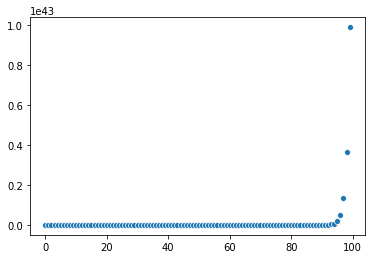

In [24]:
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import numpy as np

l1=[]
l2=[]
for i in range(100):
    l1.append(i)
    l2.append(np.exp(i))

print('pearson: ',pearsonr(l1, l2)[0])
print('spearman: ',spearmanr(l1, l2)[0])
sns.scatterplot(x=l1,y=l2)

# 2
Привести пример двух 100-элементных выборок, корреляция Пирсона которых больше 0.9, а корреляция Спирмена меньше 0.1.

pearson:  0.9945720403136884
spearman:  -0.0399039903990399


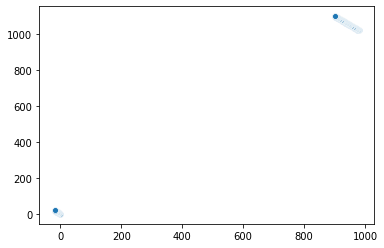

In [148]:
from scipy.stats import pearsonr, spearmanr
import math
import numpy as np

l1=[]
l2=[]
for i in range(20):
    l1.append((-1)*i)
    l2.append(i)
for i in range(20,100):
    l1.append((-1)*i+1000)
    l2.append(i+1000)

print('pearson: ',pearsonr(l1, l2)[0])
print('spearman: ',spearmanr(l1, l2)[0])
sns.scatterplot(x=l1,y=l2)

# 3
Выявить гены, коэкспрессируемые с транскрипционным фактором SPI1 в клетках молочной железы (файл healthy_breast.tsv, отсечка на абсолютное значение корреляции Спирмена — 0.8). Предположите, какие функции выполняет данный ТФ.

In [84]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

df = pd.read_csv("healthy_breast.tsv", sep="\t", index_col=0)
df = df.T
coexp={}
for i in df.columns:
    sr=spearmanr(df['SPI1'],df[i])[0]
    if sr>=0.8:
        coexp[i]=sr
    
print('с транскрипционным фактором SPI1 в клетках молочной железы коэспрессированы',len(coexp),'генов (spearmanr>=0.8)')
for i in coexp:
    print(i,coexp[i])

с транскрипционным фактором SPI1 в клетках молочной железы коэспрессированы 88 генов (spearmanr>=0.8)
ADAP2 0.8372247142889345
AIF1 0.8976985325609179
ALOX5AP 0.8116268061222189
ARHGAP30 0.8141514325000563
ARPC1B 0.8251876563803169
ARRB2 0.9225120032459482
C19orf38 0.8069021481865518
C1QA 0.8757613326420667
C1QB 0.8890246376484908
C1QC 0.9209521448053557
C3AR1 0.8088046344927078
CCR1 0.8390280188445325
CD14 0.8062800081148705
CD300A 0.8292631246759687
CD300C 0.8953542366386402
CD300LB 0.8133038793589252
CD33 0.8364312602844713
CD4 0.8788900660460294
CD74 0.8259720938620021
CD86 0.8427879088429547
CFP 0.8159367040100984
CLEC10A 0.8118341861461127
CORO7 0.8411469016973603
COTL1 0.828081960192052
CRYBB1 0.8202646349435341
CSF1R 0.8283795054437256
CTSB 0.8238441944863963
CYTH4 0.8824335594977798
DOK2 0.9153799337285576
DOK3 0.857015981786624
FCER1G 0.8664292315668461
FERMT3 0.9426098325180894
FGD2 0.8621914658611906
FGR 0.8353763271194463
FMNL1 0.8568356513310641
GPSM3 0.879214660866037
HA

C1Q - serum complement system
C3a - anaphylatoxin released during activation of the complement system
CCR1 - chemokine receptor
CD14 - surface antigen preferentially expressed on monocytes/macrophages
CD300L - cell surface glycoproteins with a single IgV-like extracellular domain, involved in the regulation of immune response
CD4 - membrane glycoprotein of T lymphocytes. The CD4 antigen acts as a coreceptor with the T-cell receptor on the T lymphocyte to recognize antigens displayed by an antigen presenting cell in the context of class II MHC molecules
LILR - leukocyte immunoglobulin like receptor
NCF - neutrophil cytosolic factor

=> SPI1 is responsible for immune cell differentiation
verification from ncbi: transcription factor that activates gene expression during myeloid and B-lymphoid cell development

# 4
Нарисовать boxplot’ы для визуализации экспрессии генов ESR1,PGR, ERBB2 и MKI67 по подтипам рака молочной железы(BRCA_pam50.tsv). Охарактеризовать данные молекулярныеподтипы (например, Luminal A экспрессирует ESR1,но неэкспрессирует ERBB2 итд).

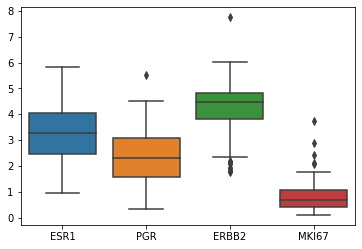

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[:,['ESR1','PGR','ERBB2','MKI67','Subtype']]

sns.boxplot(data=df.loc[df['Subtype']=='Healthy'])

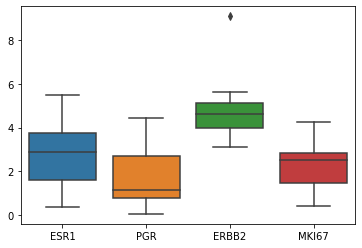

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[:,['ESR1','PGR','ERBB2','MKI67','Subtype']]

sns.boxplot(data=df.loc[df['Subtype']=='Normal-like'])

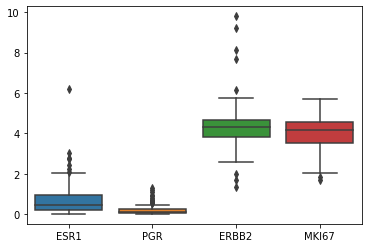

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[:,['ESR1','PGR','ERBB2','MKI67','Subtype']]

sns.boxplot(data=df.loc[df['Subtype']=='Triple-negative'])

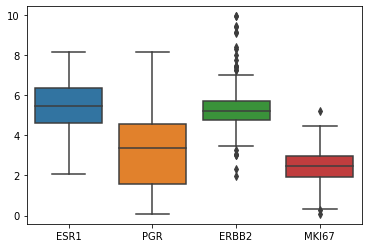

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[:,['ESR1','PGR','ERBB2','MKI67','Subtype']]

sns.boxplot(data=df.loc[df['Subtype']=='Luminal A'])

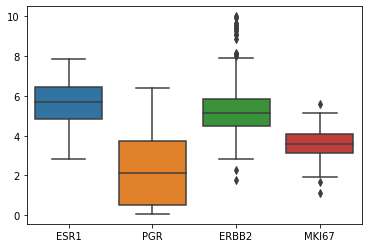

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[:,['ESR1','PGR','ERBB2','MKI67','Subtype']]

sns.boxplot(data=df.loc[df['Subtype']=='Luminal B'])

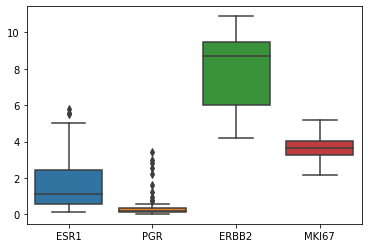

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
df = df.loc[:,['ESR1','PGR','ERBB2','MKI67','Subtype']]

sns.boxplot(data=df.loc[df['Subtype']=='HER2-enriched'])

(Q25-Q75, approximately)

Healthy:
ESR1 - 2.5-4
PGR - 1.5-3
ERBB2 - 4-5
MKI67 - 0.5-1

Normal-like:
ESR1 - 2-4
PGR - 1-3
ERBB2 - 4-5
MKI67 - 1.5-3

Triple-negative:
ESR1 - <1
PGR - ~0
ERBB2 - ~4
MKI67 - 3.5-5

Luminal A:
ESR1 - 4.5-6.5
PGR - 1.5-4.5
ERBB2 - 5-6
MKI67 - 2-3

Luminal B:
ESR1 - 5-6.5
PGR - 0.5-3.5
ERBB2 - 4.5-6
MKI67 - 3-4

HER2-enriched:
ESR1 - 0.5-2.5
PGR - ~0
ERBB2 - 6-9
MKI67 - ~4

# 5
В файле human_coronavirus_aln_scores.tsv приведена матрица качеств выравниваний геномов 140 человеческих коронавирусов (первые 20 — геномы HCoV-HKU1, следующие 20 — MERS-CoV, далее SARS-CoV-2, HCoV-229E, HCoV-NL63, HCoV-OC43, SARS-CoV). Превратить эту матрицу в матрицу расстояний (придумать как), использовать полученную матрицу для визуализации методом t-SNE (см. аргумент metric="precomputed"). Попробовать различные значения перплексии (нужно получить семь кластеров).

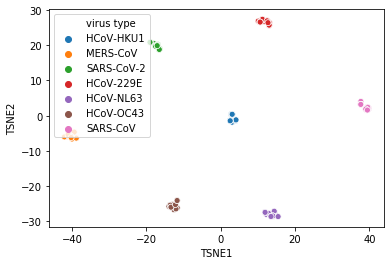

In [149]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

df = pd.read_csv("human_coronavirus_aln_scores.tsv", sep="\t", index_col=0)
df=1/(df/5000)-1

model = TSNE(perplexity=15,metric='precomputed')
df=model.fit_transform(df)
df=pd.DataFrame(df,columns=['TSNE1','TSNE2'])
df['virus type']=['HCoV-HKU1']*20+['MERS-CoV']*20+['SARS-CoV-2']*20+['HCoV-229E']*20+['HCoV-NL63']*20+['HCoV-OC43']*20+['SARS-CoV']*20

sns.scatterplot(data=df,x='TSNE1',y='TSNE2',hue='virus type')